In [1]:
import sys
sys.path.append("./../my-staff")
from database import load_ds
from utils import normalize
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from globals import SEED
from clustering import interpret_cluster, show_clusters

In [2]:
X, y, features_names, class_names = load_ds("clustering")

In [3]:
X.shape

(312, 20)

In [4]:
X_norm = normalize(X)

# Test

In [5]:
from sklearn.cluster import KMeans
import numpy as np

# Create some sample data
data, labels = make_blobs(n_samples=300, centers=3, random_state=42)

# Define the number of clusters
kmeans = KMeans(n_clusters=3, random_state=SEED)

# Fit the data to the KMeans model
kmeans.fit(data)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster labels:", labels)
print("Centroids:", centroids)

Cluster labels: [0 0 1 2 0 2 1 2 1 1 1 2 1 1 0 1 0 2 1 1 1 1 2 0 1 0 0 2 2 1 1 1 0 1 0 1 0
 2 0 2 2 1 0 2 1 1 0 2 0 2 2 0 0 1 0 2 0 1 2 1 0 2 2 0 0 2 2 0 0 1 2 0 0 1
 1 0 0 2 1 2 1 1 0 1 2 0 0 1 2 1 0 1 0 1 1 0 0 1 0 0 2 1 2 1 1 1 1 1 2 0 2
 1 1 1 1 2 0 2 0 2 2 2 1 0 0 0 0 1 0 0 1 1 1 1 1 2 2 0 1 0 1 1 0 1 2 2 2 1
 2 1 1 0 2 0 1 2 2 0 0 1 1 0 0 0 1 0 2 1 1 1 1 1 2 1 2 2 2 1 2 2 0 1 0 2 2
 0 2 1 2 2 0 0 2 0 2 2 2 2 1 0 1 1 2 2 1 2 0 0 2 1 1 0 2 2 0 0 0 0 1 0 0 2
 0 0 1 2 0 0 2 1 1 0 1 0 2 2 0 2 0 0 0 2 2 1 0 2 2 2 0 2 0 2 0 2 2 0 2 1 0
 1 1 1 0 1 2 2 0 2 2 1 1 2 2 2 0 0 0 1 1 1 2 2 2 2 0 2 0 2 2 0 1 2 2 1 0 1
 2 1 0 0]
Centroids: [[-6.88387179 -6.98398415]
 [-2.63323268  9.04356978]
 [ 4.74710337  2.01059427]]


/home/alvaro/Desktop/MachineLearning/PracticalApplications/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


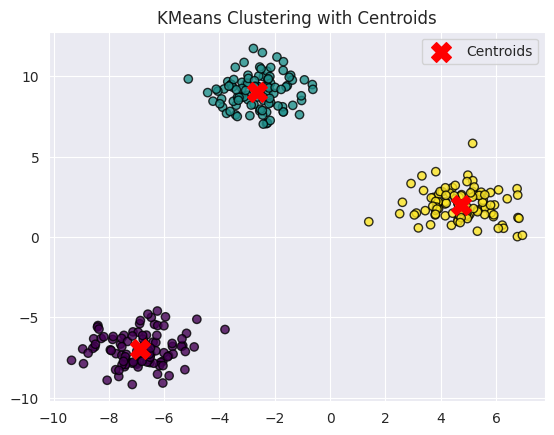

In [6]:
# Plot the clusters and centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.8, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.legend()
plt.title('KMeans Clustering with Centroids')
plt.show()

# Real Data

## kmeans

In [7]:
def k_means_show(k, df, df_norm):

    # Define the number of clusters
    kmeans = KMeans(n_clusters=k, algorithm="lloyd", random_state=SEED, n_init=10)

    # Fit the data to the KMeans model
    kmeans.fit(df_norm)

    # Get cluster labels and centroids
    labels = kmeans.labels_

    interpret_cluster(df, labels)

    show_clusters(df_norm, labels)


Métricas de evaluación:
Precision: 0.8947
Recall: 0.8617
F1-score: 0.8604


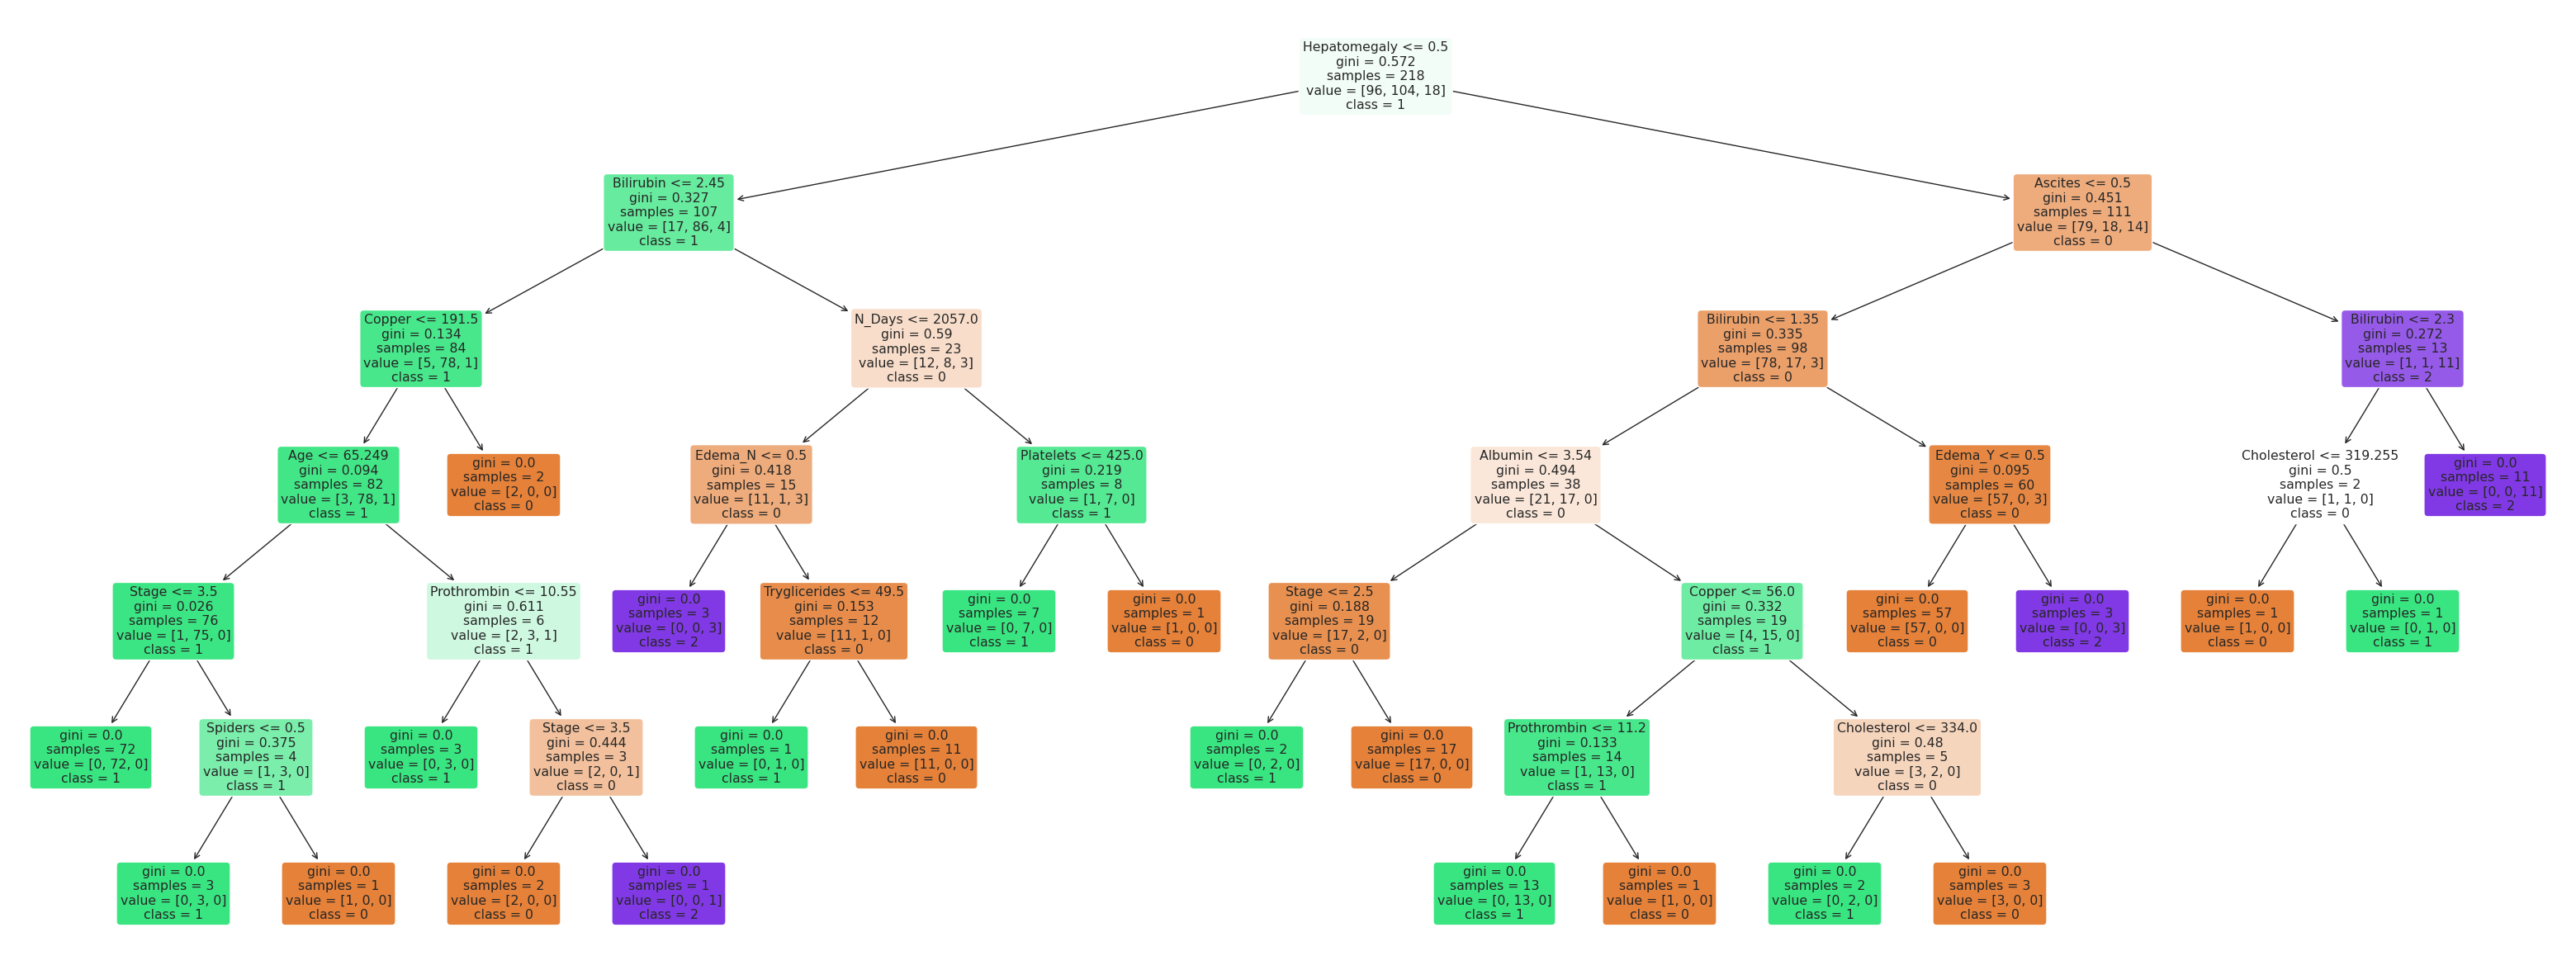

(312, 2)


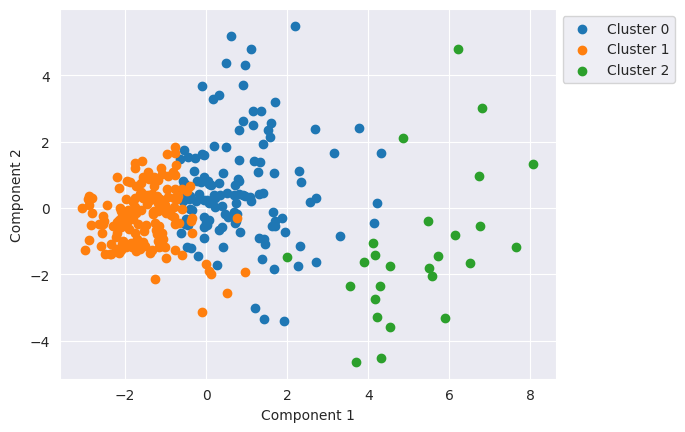

In [8]:
k_means_show(3, X, X_norm)

Métricas de evaluación:
Precision: 0.8428
Recall: 0.8191
F1-score: 0.8243


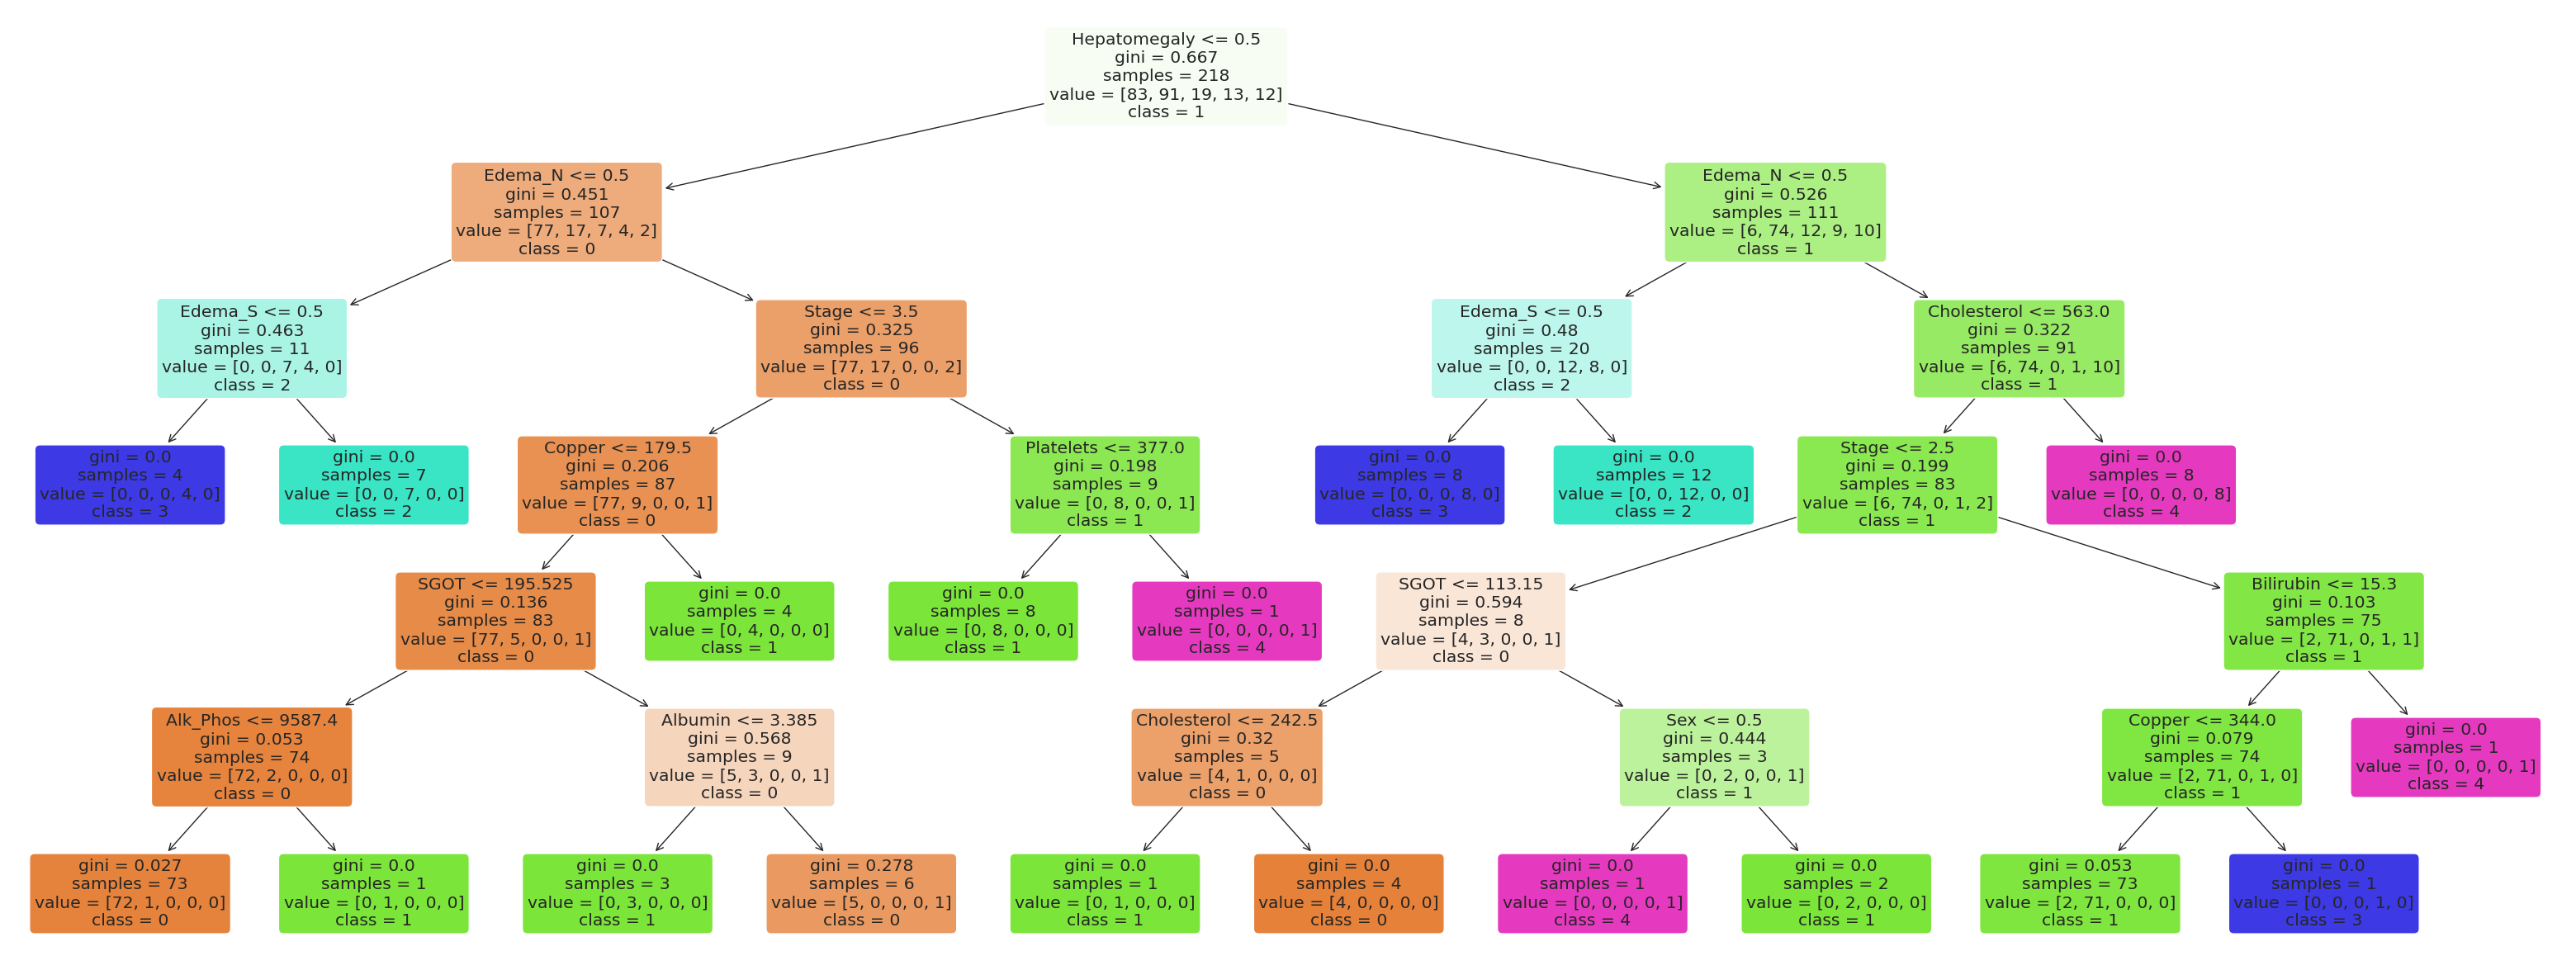

(312, 2)


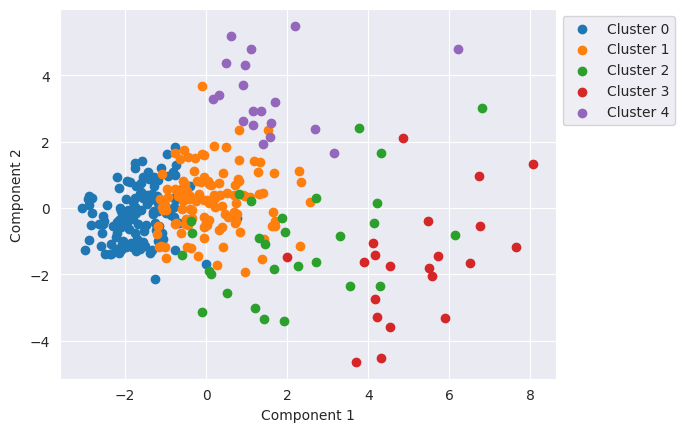

In [9]:
k_means_show(5, X, X_norm)
